# MNIST 손글씨 인식하기: 데이터 전처리


In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


## SEED 값 설정

In [2]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

## MNIST 데이터 셋 불러오기

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개"% (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개"% (X_test.shape[0]))


학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


## 차원 변환 과정

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train.astype("float32")
X_train = X_train/255

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")/255

## 바이너리화 과정 (One hot encoding)

In [5]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

# 컨볼루션 프레임 만들기

## 모델 프레임 설정

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1),activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## 모델 실행 환경 설정

In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## 모델 최적화 설정

In [15]:
MODEL_DIR= './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss: .4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

## 모델의 실행

In [16]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0,callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.05693, saving model to ./model/01- 0.0569.hdf5

Epoch 00002: val_loss improved from 0.05693 to 0.03922, saving model to ./model/02- 0.0392.hdf5

Epoch 00003: val_loss improved from 0.03922 to 0.03422, saving model to ./model/03- 0.0342.hdf5

Epoch 00004: val_loss improved from 0.03422 to 0.03115, saving model to ./model/04- 0.0311.hdf5

Epoch 00005: val_loss improved from 0.03115 to 0.03051, saving model to ./model/05- 0.0305.hdf5

Epoch 00006: val_loss improved from 0.03051 to 0.02706, saving model to ./model/06- 0.0271.hdf5

Epoch 00007: val_loss did not improve from 0.02706

Epoch 00008: val_loss improved from 0.02706 to 0.02632, saving model to ./model/08- 0.0263.hdf5

Epoch 00009: val_loss did not improve from 0.02632

Epoch 00010: val_loss did not improve from 0.02632

Epoch 00011: val_loss did not improve from 0.02632

Epoch 00012: val_loss did not improve from 0.02632

Epoch 00013: val_loss did not improve from 0.02632

Epoch 00014:

## 테스트 정확도 출력

In [17]:
print("\n Test Accuracy; %.4f"% (model.evaluate(X_test,Y_test)[1]))

10000/10000 [==============================] - 5s 538us/step

 Test Accuracy; 0.9935


## 테스트셋의 오차와 학습셋의 오차

In [18]:
y_vloss = history.history['val_loss']
y_loss= history.history['loss']

## 그래프로 표현

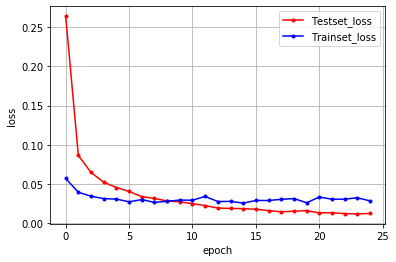

In [19]:
x_len =numpy.arange(len(y_loss))
plt.plot(x_len,y_loss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len,y_vloss, marker=".", c="Blue", label='Trainset_loss')

plt.legend(loc='upper right')

plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()